## Sobre o desafio

De acordo com o que foi ensinado no módulo, iremos trabalhar com previsões de vendas de uma loja. O dicionário disponibilizado não é difícil de entender, porém deveremos contar com as implementações que vimos no módulo para:

- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

Caso tenha alguma dúvida, revise o módulo com calma e reveja suas anotações! Você irá conseguir!

In [1]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame(dados_vendas)
df

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [20]:
df['num mes'] = list(range(1,13))
df = df[['num mes', 'vendas']]
df


,num mes,vendas
0,1,2000
1,2,2200
2,3,2300
3,4,2500
4,5,2600
5,6,2700
6,7,2800
7,8,2900
8,9,3000
9,10,3100


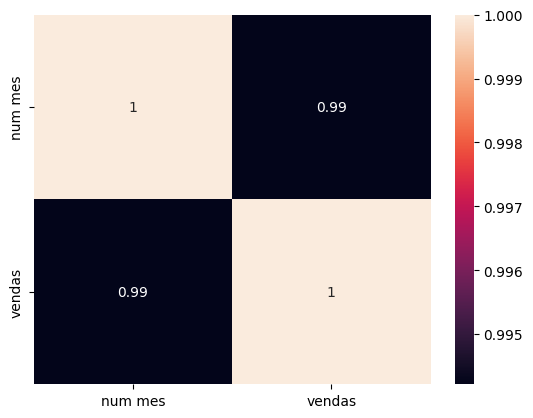

In [23]:
sns.heatmap(df.corr(), annot=True);

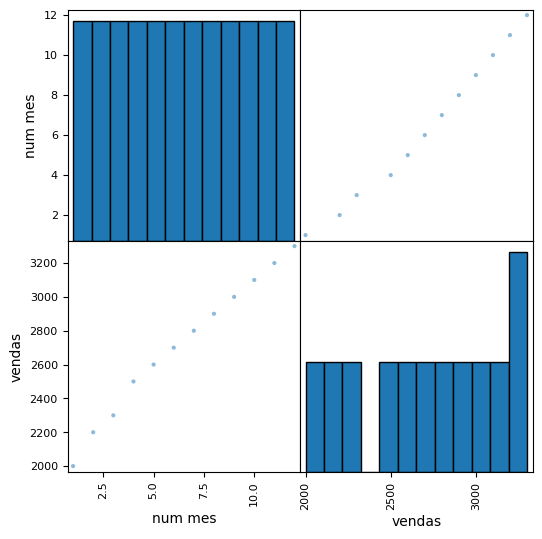

In [58]:
hist_params = {'bins': 12, 'edgecolor': 'black'}

# Gerar a matriz de gráficos de dispersão com histogramas na diagonal
scatter_matrix_fig = pd.plotting.scatter_matrix(
    df, 
    figsize=(6, 6), 
    diagonal='hist', 
    hist_kwds=hist_params
    )

plt.show()



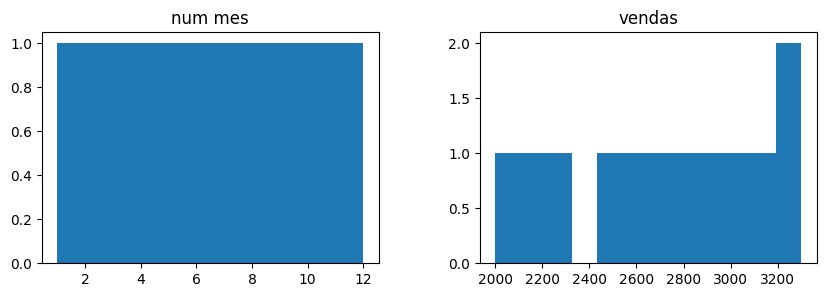

In [66]:
df.hist(bins=12, figsize=(10,3), grid=False)
plt.show()

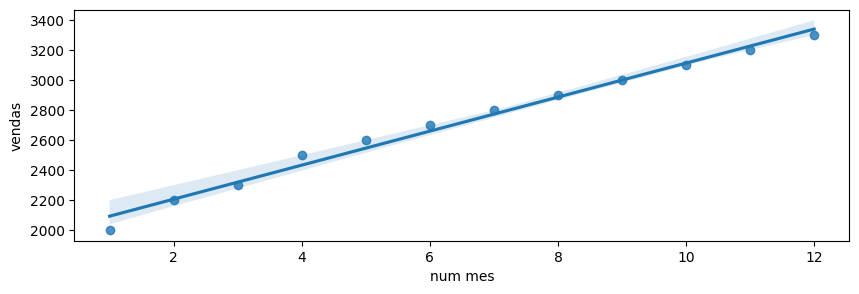

In [70]:
plt.figure(figsize=(10,3))
sns.regplot(data=df, x='num mes', y='vendas')
plt.show()

### Treinar o Modelo

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [81]:
X = pd.DataFrame(df['num mes']) # X precisa ser um dataframe
y = df['vendas']

In [82]:
X

,num mes
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [77]:
y

0     2000
1     2200
2     2300
3     2500
4     2600
5     2700
6     2800
7     2900
8     3000
9     3100
10    3200
11    3300
Name: vendas, dtype: int64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

In [84]:
len(X_train), len(X_test)

(8, 4)

In [85]:
model_1 = LinearRegression().fit(X_train, y_train)

In [103]:
model_1.intercept_

2009.6654275092937

In [106]:
print('Modelo #1:')
print(f'{model_1.intercept_:.0f} + {model_1.coef_[0]:,.0f}*(num_mês)')

Modelo #1:
2010 + 109*(num_mês)


In [86]:
y_pred = model_1.predict(X_test)

In [153]:
results_model_1 = pd.concat([X_test, y_test, pd.Series(y_pred, index=results_model_1.index, name='y_pred')], axis=1)
results_model_1

,num mes,vendas,y_pred
8,9,3000,2992.193309
5,6,2700,2664.684015
4,5,2600,2555.514250
0,1,2000,2118.835192


In [155]:
results_model_1.rename(columns={'num mes': 'X_test', 'vendas': 'y_test'})

,X_test,y_test,y_pred
8,9,3000,2992.193309
5,6,2700,2664.684015
4,5,2600,2555.514250
0,1,2000,2118.835192


In [164]:
results_model_1['y_pred'] = results_model_1['y_pred'].astype('int')
results_model_1

,num mes,vendas,y_pred
8,9,3000,2992
5,6,2700,2664
4,5,2600,2555
0,1,2000,2118


In [165]:
r2_score(y_test, y_pred)

0.9669972549065925

In [166]:
mean_absolute_error(y_test, y_pred)

51.61090458488229

In [167]:
mean_absolute_percentage_error(y_test, y_pred)

0.023052431184401458

### Prevendo Dezembro

Vou criar um model_2 treinado de janeiro a novembro para prever dezembro. Depois vou comparar com o resultado do model_1.

In [171]:
X_train2 = X.iloc[0:11]
y_train2 = y.iloc[0:11]

In [172]:
model_2 = LinearRegression().fit(X_train2, y_train2)

In [173]:
print('Modelo #2:')
print(f'{model_2.intercept_:.0f} + {model_2.coef_[0]:,.0f}*(num_mês)')

Modelo #2:
1971 + 115*(num_mês)


In [183]:
import numpy as np

X_test2 = np.array([[12]]) # X_test2 deve ser uma matriz

In [186]:
model_1.predict(X_test2)[0]

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3319.7026022304835

In [188]:
print('Comparando valores de model_1 e model_2 para Dezembro:')
print(f'model_1: {model_1.predict(X_test2)[0]:.0f}  model_2: {model_2.predict(X_test2)[0]:.0f}')
print(f'Vendas em Dezembro: {y.iloc[11]}')

Comparando valores de model_1 e model_2 para Dezembro:
model_1: 3320  model_2: 3356
Vendas em Dezembro: 3300


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Para dezembro o model_1 foi melhor.